In [ ]:
import os
import numpy as np
import pandas as pd

from src.process import Processor, TranTestSplit
from src.models import get_result, ModelHub, HGDeepForestClassifier, StackingLR, ResHGDeepForest
from src.metric import Metric

In [ ]:
processor = Processor('data/tiny_train.csv')
feature, label = processor.data_preprocess_v1()
tts = TranTestSplit(feature, label)
train_x, train_y, test_x, test_y = tts.split()

In [ ]:
df = pd.read_csv('data/train.csv')
processor = Processor(df)
processor.sample(pos_frac=0.05, neg_frac=0.1)
feature, label = processor.data_preprocess_v1()
feature, label = processor.imbalance_sample(feature, label)

n_split = 5
tts = TranTestSplit(feature, label)
train_x, train_y, test_x, test_y = tts.split()

# train_x, train_y = processor.imbalance_sample(train_x, train_y)

In [ ]:
result = []
result.append(get_result(
    model_name='deep_forest',
    model_instance=ModelHub('deep_forest'),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='hg_deep_forest',
    model_instance=HGDeepForestClassifier(),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='hg_deep_forest_lr',
    model_instance=HGDeepForestClassifier(use_predictor=True),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))


result.append(get_result(
    model_name='stack_lr',
    model_instance=StackingLR(),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='res_hg_deep_forest',
    model_instance=ResHGDeepForest('hg_deep_forest', 3),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='res_deep_forest',
    model_instance=ResHGDeepForest('deep_forest', 3),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

In [ ]:
# model = ModelHub('deep_forest')
# model.fit(train_x, train_y)
# proba = model.predict_proba(test_x)
# metric = Metric(test_y, proba[:, 1])
# metric.summary()

# model = HGDeepForestClassifier()
# model.fit(train_x, train_y)
# proba = model.predict_proba(test_x)
# metric = Metric(test_y, proba[:, 1])
# metric.summary()

In [ ]:
metric = Metric(result[1]['label'], result[1]['proba'][:, 1])
metric.summary()

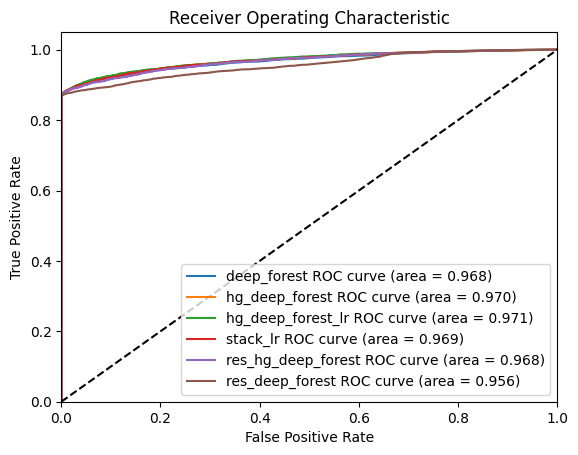

In [27]:
curves = dict()
for r in result:
    if r['proba'].ndim == 1:
        curves[r['model_name']] = [r['label'], r['proba']]
    else:
        curves[r['model_name']] = [r['label'], r['proba'][:, 1]]
Metric.gather_roc_curve(curves)

In [ ]:
for i in range(6):
    proba = result[i]['proba']
    if proba.ndim == 2:
        proba = proba[:, 1]
    metric = Metric(result[i]['label'], proba)
    metric.summary(info=result[i]['model_name'])